## Infinite Overlapping Mixture Model with Binary clusters

In [1]:
%load_ext autoreload
%autoreload 2
import utils, iomm

### Synthetic Data

In [2]:
#Generate synthetic data
K=6
N=500
D=8
N_iter=100
alpha_prior = 4
burning_period=25

Z = utils.random_z(N,K)
X = utils.random_x(N,D)
theta= utils.random_theta(N,K,D,alpha_prior)

In [3]:
Z

array([[ 0.,  0.,  1.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  1.,  0.],
       ..., 
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  0.,  0.]])

In [4]:
X

array([[ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  1., ...,  0.,  0.,  1.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 1.,  0.,  1., ...,  0.,  1.,  0.],
       [ 0.,  0.,  1., ...,  1.,  0.,  0.]])

In [5]:
theta

array([[  3.71765579e-01,   1.73944497e-01,   1.05723519e-01,
          9.87896557e-01,   5.30241737e-01,   5.71200683e-01,
          3.45256738e-01,   3.32880921e-01],
       [  5.56458467e-02,   5.21479004e-01,   4.70062367e-01,
          8.97603392e-01,   7.94728466e-01,   1.64814319e-01,
          5.77671259e-01,   7.39685209e-02],
       [  9.50197091e-01,   9.21462185e-01,   9.65841162e-01,
          5.44603257e-01,   7.50118010e-01,   1.48812258e-01,
          8.51846071e-01,   9.06013750e-01],
       [  2.26444789e-01,   7.53178916e-01,   8.63136189e-01,
          3.41013258e-01,   4.40540006e-01,   1.86571223e-05,
          6.35783592e-02,   3.78585329e-01],
       [  7.85338076e-01,   6.86082685e-01,   7.80645615e-01,
          3.05003566e-01,   6.99894444e-01,   5.14906181e-01,
          9.10964514e-01,   2.19010471e-02],
       [  7.66522937e-01,   8.19915180e-01,   2.98452089e-01,
          5.80019734e-01,   7.79947017e-02,   1.95611316e-03,
          2.71426906e-01,   7.7

#### IOMM algorithm

In [6]:
IOMM = iomm.IOMM(N = N, 
                 K = K, 
                 D = D, 
                 N_iter = N_iter, 
                 Z = Z, 
                 X = X, 
                 theta = theta, 
                 alpha_prior = alpha_prior, 
                 omega = 1,
                 copy_rows = 250,
                 burning_period=burning_period)

In [7]:
%%capture
Z_hat,theta_resampled,Z_hat_mean,U_hat = IOMM.learning(apply_log=False,random_walk=False)

In [8]:
Z_hat_mean

array([[ 0.        ,  0.        ,  0.98666667,  0.        ,  0.98666667,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.98666667,
         0.        ],
       [ 0.        ,  0.        ,  0.98666667,  0.        ,  0.98666667,
         0.        ],
       ..., 
       [ 0.24      ,  0.05333333,  0.2       ,  0.14666667,  0.17333333,
         0.14666667],
       [ 0.16      ,  0.05333333,  0.21333333,  0.05333333,  0.13333333,
         0.10666667],
       [ 0.09333333,  0.21333333,  0.21333333,  0.12      ,  0.18666667,
         0.13333333]])

In [9]:
Z_hat

array([[ 0.,  0.,  1.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  1.,  0.],
       ..., 
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.]])

In [10]:
Z

array([[ 0.,  0.,  1.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  1.,  0.],
       ..., 
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  0.,  0.]])

In [11]:
Z-Z_hat

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0., -1.,  1.],
       [ 0.,  0.,  0.,  1., -1.,  0.]])

In [12]:
from matplotlib import pyplot as plt 
import numpy as np

In [13]:
theta_evol=np.zeros([N_iter,K*D])
theta_evol_mean=np.zeros([N_iter,K*D])
temp=0
ind_evol=0
for n in range(N_iter):
    ind_evol=0
    for d in range(D):
        for k in range(K):
            theta_evol[n,ind_evol]=theta_resampled[n][k,d]
            ind_evol=ind_evol+1

for n in range(N_iter):
    for ind in range(K*D):
        theta_evol_mean[n,ind]=np.sum(theta_evol[:n,ind])/(n+1)

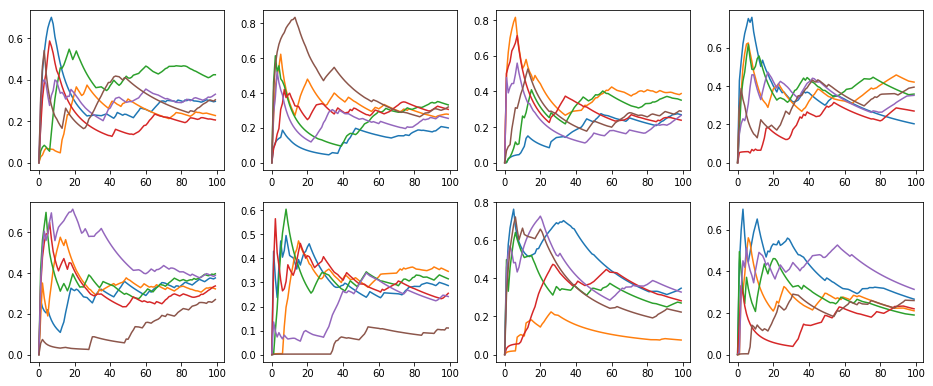

In [14]:
fig=plt.figure(figsize=(16,10))

for d in range(D):
    ax=fig.add_subplot(3,4,d+1)
    for kd in range(K*(d),K*(d+1)):
        ax.plot(range(N_iter),theta_evol_mean[:,kd])
plt.show()

In [15]:
#we compute the U matrix N*N showing the number of shared clusters between each data point
#U_hat=np.around(np.dot(Z_hat_mean,Z_hat_mean.T),0)
#print(U_hat)
U=np.dot(Z,Z.T)
print(U)

[[ 2.  1.  2. ...,  0.  1.  0.]
 [ 1.  1.  1. ...,  0.  0.  0.]
 [ 2.  1.  2. ...,  0.  1.  0.]
 ..., 
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 1.  0.  1. ...,  0.  2.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]]


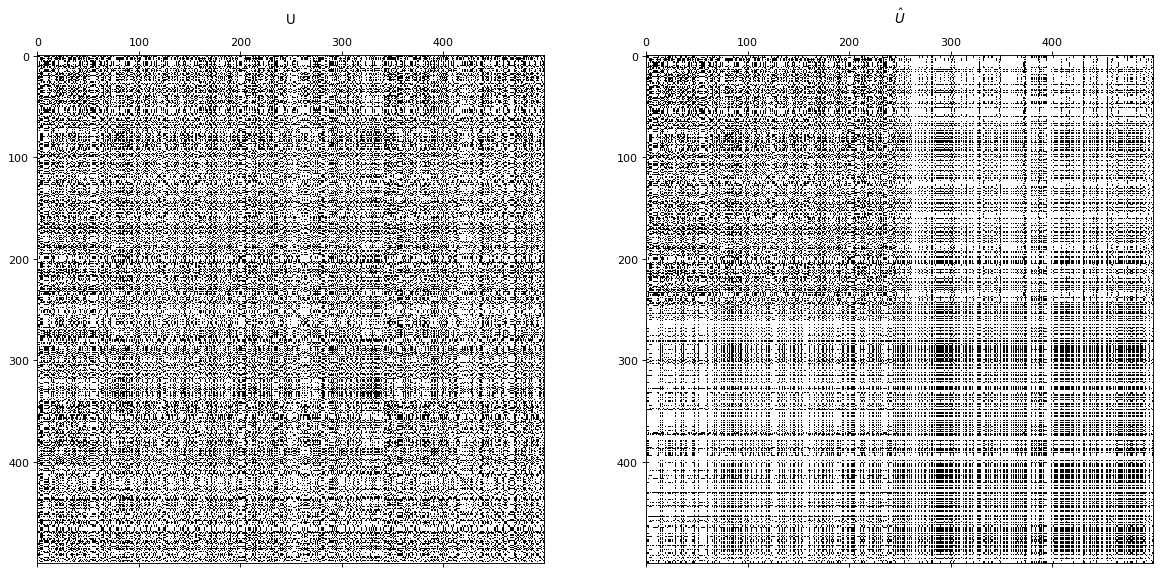

In [16]:
fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.title.set_text('U')
ax2.title.set_text('$\hat{U}$')

ax1.spy(U)
ax2.spy(U_hat)

plt.show()

In [17]:
#summmary statistics
U_diff=abs(U-U_hat)
print("% of pairs having same number of clusters:",len(U_diff[U_diff==0])/(N*N))
print("% of pairs having at most 1 cluster difference:",len(U_diff[U_diff<2])/(N*N))
print("% of pairs having at most 2 clusters difference:",len(U_diff[U_diff<3])/(N*N))
print("% of pairs having at most 3 clusters difference:",len(U_diff[U_diff<4])/(N*N))

% of pairs having same number of clusters: 0.536256
% of pairs having at most 1 cluster difference: 0.991956
% of pairs having at most 2 clusters difference: 0.999996
% of pairs having at most 3 clusters difference: 1.0


In [ ]:
#TODO boxplot des U_diff